<a href="https://colab.research.google.com/github/naghma28/CardioFitnessGood/blob/main/CardioGood.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Cardio Good Fitness Case Study - Descriptive Statistics**

The market research team at AdRight is assigned the task to identify the profile of the typical customer for each treadmill product offered by CardioGood Fitness. The market research team decides to investigate whether there are differences across the product lines with respect to customer characteristics. The team decides to collect data on individuals who purchased a treadmill at a CardioGoodFitness retail store during the prior three months. The data are stored in the CardioGoodFitness.csv file.

The team identifies the following customer variables to study:
* product purchased, TM195, TM498, or TM798;
* gender;
* age, in years;
* education, in years;
* relationship status, single or partnered;
* annual household income ;
* average number of times the customer plans to use the treadmill each week;
* average number of miles the customer expects to walk/run each week;
* and self-rated fitness on an 1-to-5 scale, where 1 is poor shape and 5 is excellent shape.
Perform descriptive analytics to create a customer profile for each CardioGood Fitness treadmill product line.

# **Importing important libraries and loading data**

In [3]:
# importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
#read the dataset
filepath = '/content/drive/MyDrive/ColabNotebooks/PracticeCode/CardioGoodFitness-DescriptiveStats/CardioGoodFitness.csv'
df = pd.read_csv(filepath)

# **Performing some basic analysis to get information about the data**

In [6]:
df.describe(include='all')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,TM195,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [9]:
df.shape

(180, 9)

In [10]:
df.Product.unique()

array(['TM195', 'TM498', 'TM798'], dtype=object)

In [12]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


## Inference

1. It can be observed that we have good number of different datas set with mixture of categorical and unqiue columns.
2. In total, there are 9 columns and 180 rows which comprises of small information.
3. We have a list of 3 categorical unqiue Product which are 'TM195', 'TM498' and 'TM798'.
4. We can also see few NaN values in the columns above which needs to be handled and cleaned to perform in-depth analysis.

# **Performing EDA**

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Education'}>],
       [<AxesSubplot:title={'center':'Usage'}>,
        <AxesSubplot:title={'center':'Fitness'}>],
       [<AxesSubplot:title={'center':'Income'}>,
        <AxesSubplot:title={'center':'Miles'}>]], dtype=object)

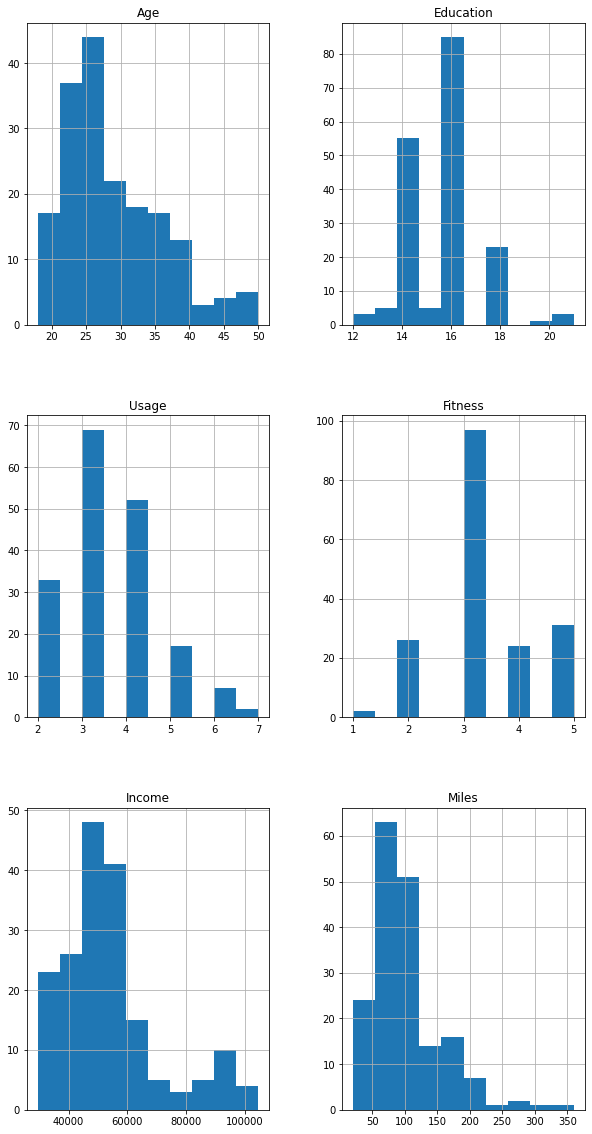

In [13]:
df.hist(figsize=(10,20))

Using histogram, we plotted the count of each data against their parameter and it can be seen that most of the graph is right-skewed.

<AxesSubplot:xlabel='Gender', ylabel='Age'>

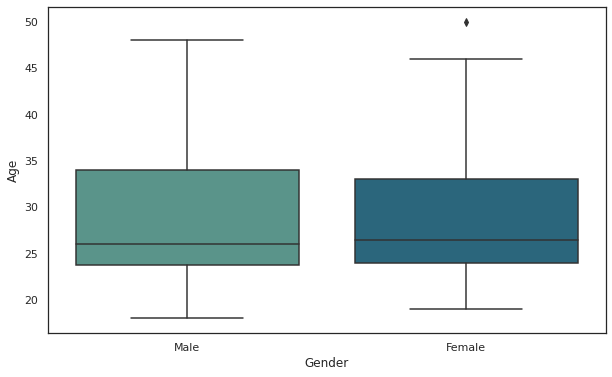

In [24]:
sns.boxplot(x='Gender', y='Age', data=df, palette = 'crest')

When we plot the graph of age distribution across different genders, we see that the majority of people are between the ages of 18 and 35, with an outlier in female.

Length of viscor = 1.5 x Inter Quartile Range 

In [ ]:
pd.crosstab(df['Product'],df['MaritalStatus'])

MaritalStatus,Partnered,Single
Product,,
TM195,48,32
TM498,36,24
TM798,23,17


## **Variation in Treadmill buying by Gender**

In [25]:
df.groupby(['Product','Gender'])['Gender'].count().unstack()

Gender,Female,Male
Product,,
TM195,40,40
TM498,29,31
TM798,7,33


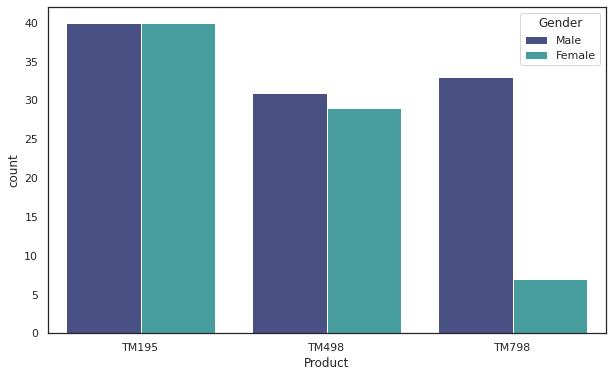

In [27]:
sns.countplot(x="Product", hue = "Gender", data=df, palette="mako")
#sns.set(rc={'figure.figsize':(10,6)})
sns.set(style="white")

Curiously, the first product (TM195) has an equal number of male and female purchasers, however the third product (TM798) has a lower number of female buyers than male buyers.

In [33]:
pd.pivot_table(df, index=['Product','Gender'], columns=['MaritalStatus'], aggfunc =len)

Age        Education          Fitness           Income  \
MaritalStatus  Partnered Single Partnered Single Partnered Single Partnered   
Product Gender                                                                
TM195   Female        27     13        27     13        27     13        27   
        Male          21     19        21     19        21     19        21   
TM498   Female        15     14        15     14        15     14        15   
        Male          21     10        21     10        21     10        21   
TM798   Female         4      3         4      3         4      3         4   
        Male          19     14        19     14        19     14        19   

                          Miles            Usage         
MaritalStatus  Single Partnered Single Partnered Single  
Product Gender                                           
TM195   Female     13        27     13        27     13  
        Male       19        21     19        21     19  
TM498   Female     14        15     14        15     14  
        Male       10        21     10        21     10  
TM798   Female      3         4      3         4      3  
        Male       14        19     14        19     14

In [34]:
pd.pivot_table(df,'Income',index=['Product','Gender'],columns=['MaritalStatus'])

MaritalStatus      Partnered        Single
Product Gender                            
TM195   Female  46153.777778  45742.384615
        Male    50028.000000  43265.842105
TM498   Female  49724.800000  48920.357143
        Male    49378.285714  47071.800000
TM798   Female  84972.250000  58516.000000
        Male    81431.368421  68216.428571

When the income of the population is compared to the product, it is discovered that the third type of treadmill is made up of people with slightly greater incomes than the first and second types of treadmill.

## **Univariate Analysis**

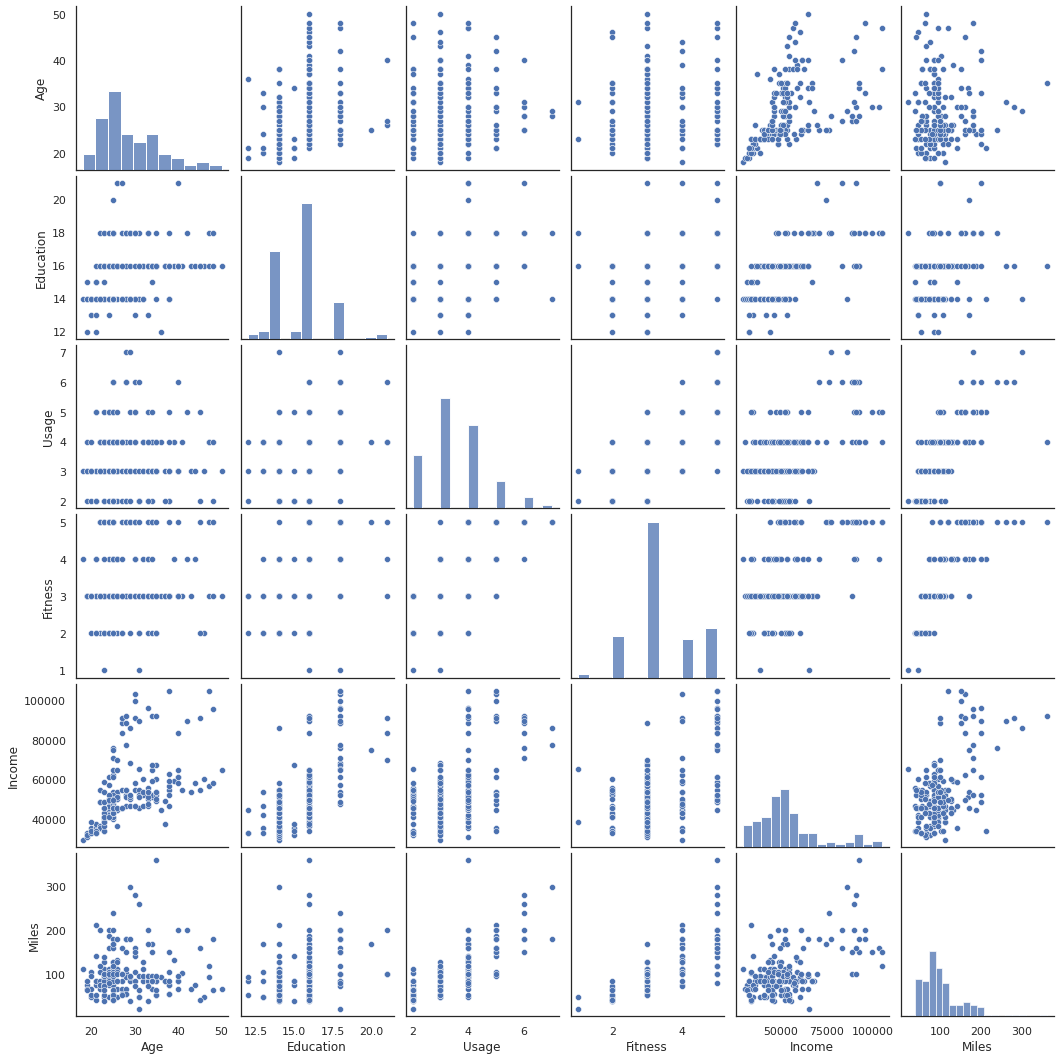

In [35]:
sns.pairplot(df)

We may see the link between distinct numerical columns in pair using the pair plot and obtain some information.

## **Variation of treadmill purchase with respect to Age**

In [47]:
df.groupby(['Product','Fitness'])['Fitness'].count().unstack().fillna(0)

Fitness,1,2,3,4,5
Product,,,,,
TM195,1.0,14.0,54.0,9.0,2.0
TM498,1.0,12.0,39.0,8.0,0.0
TM798,0.0,0.0,4.0,7.0,29.0


<AxesSubplot:xlabel='Product', ylabel='Fitness'>

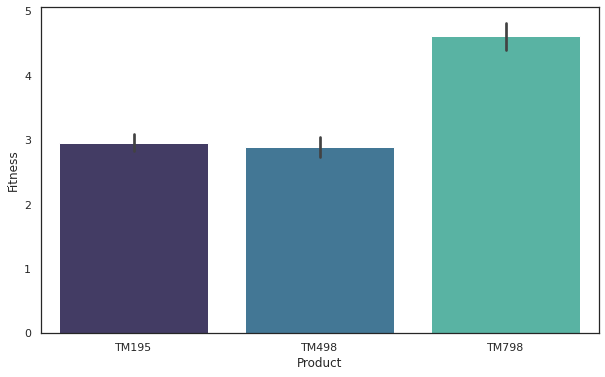

In [54]:
sns.barplot(x='Product',y='Fitness', data=df, palette ="mako")